In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml # importar o conjunto de dados mnist - varias imagens de letras escritas a mão

In [2]:
mnist = fetch_openml("mnist_784", version=1)

/home/anamarcacini/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
x, y = mnist["data"], mnist["target"]
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
x, y = mnist["data"].values, mnist["target"].values
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
y = y.astype(float)

In [12]:
#y = y.astype(np.float)

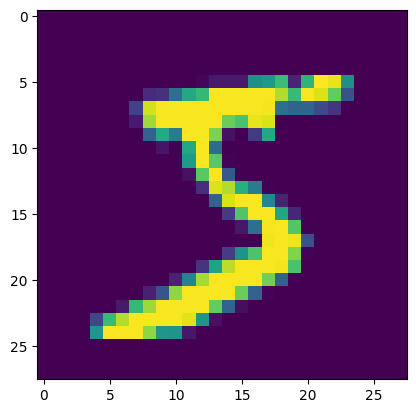

In [13]:
plt.imshow(x[0].reshape(28, 28))

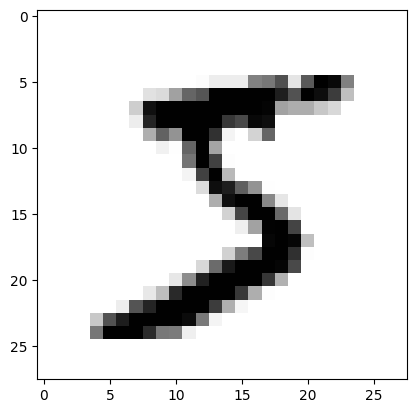

5.0


In [14]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")# acesso a primeira linha x[0] --> reorganiza num formato 28x28 + escala de cor preto e branco cmap="binary"
plt.show()
print(y[0]) # mostra o primeiro elemento - esse desenho representa o numero 5

5.0


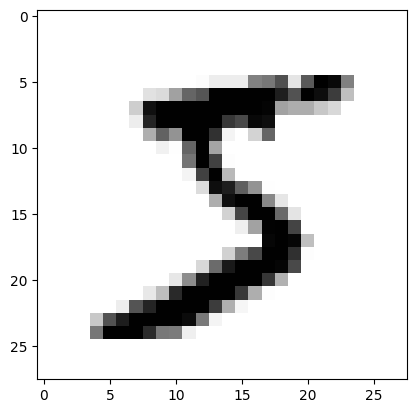

0.0


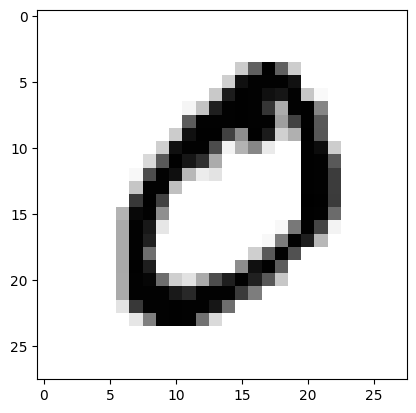

4.0


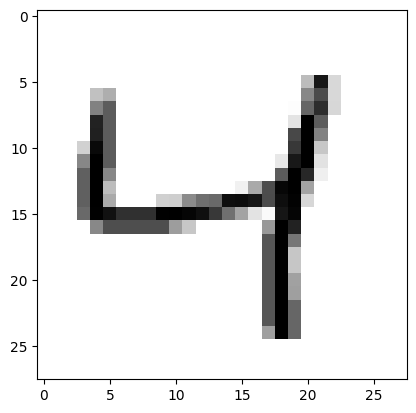

1.0


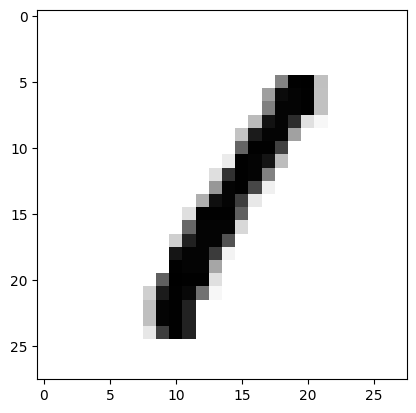

9.0


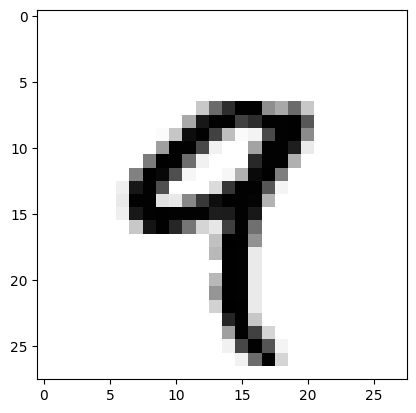

2.0


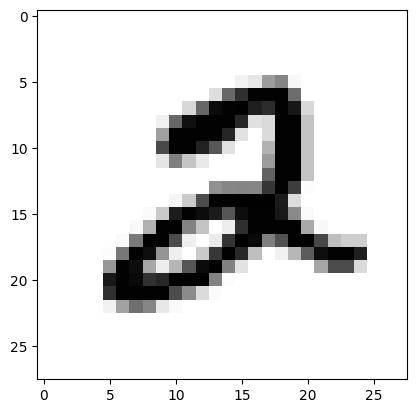

1.0


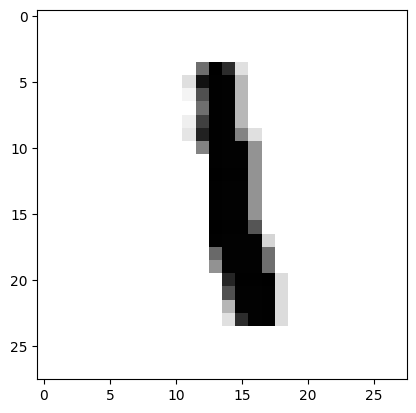

3.0


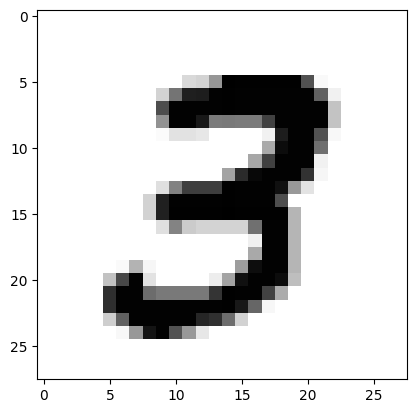

1.0


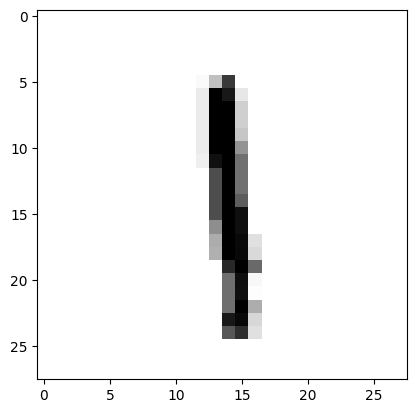

4.0


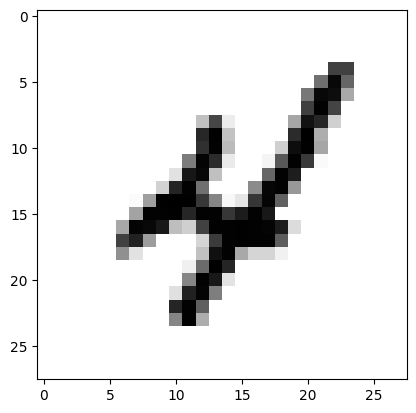

In [15]:
# Vendo o conjunto de dados - 70000 numeros
for n in range(10):
    print(y[n]) 
    plt.imshow(x[n].reshape(28, 28), cmap="binary")# acesso a primeira linha x[0] --> reorganiza num formato 28x28 + escala de cor preto e branco cmap="binary"
    plt.show()


### Classificador binário

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
x_train.shape

(49000, 784)

In [19]:
y_train_5 = (y_train == 5)
pd.Series(y_train_5).value_counts()

False    44611
True      4389
Name: count, dtype: int64

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

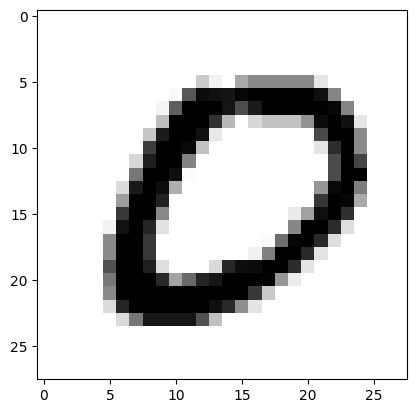

Classe real:  False
Classe predita pelo modelo:  [False]


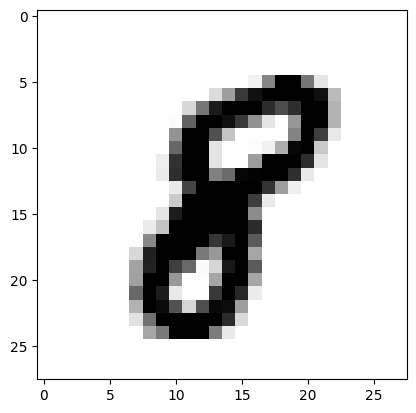

Classe real:  False
Classe predita pelo modelo:  [False]


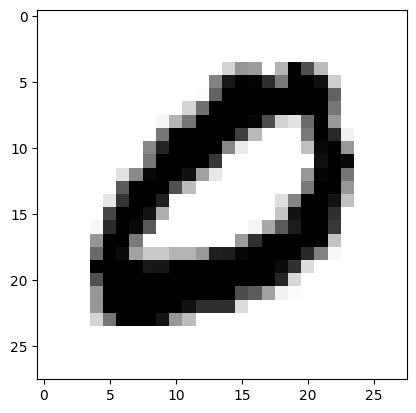

Classe real:  False
Classe predita pelo modelo:  [False]


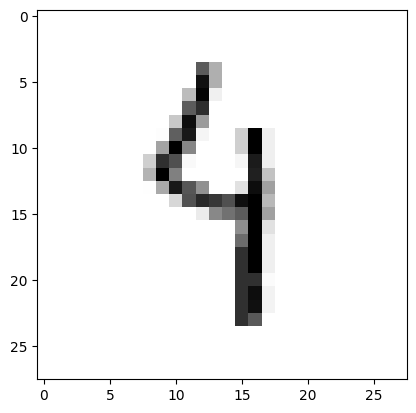

Classe real:  False
Classe predita pelo modelo:  [False]


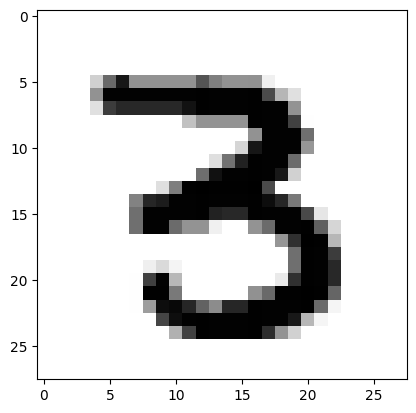

Classe real:  False
Classe predita pelo modelo:  [False]


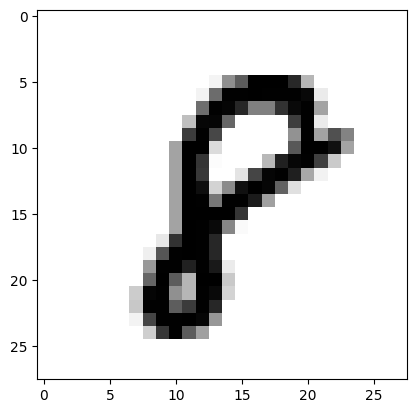

Classe real:  False
Classe predita pelo modelo:  [False]


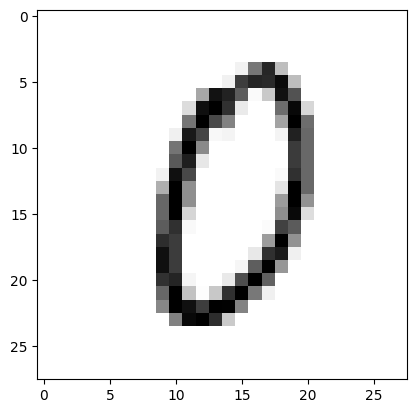

Classe real:  False
Classe predita pelo modelo:  [False]


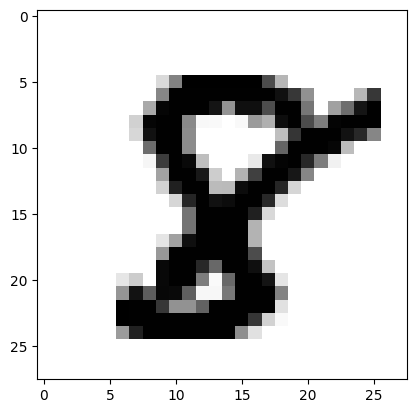

Classe real:  False
Classe predita pelo modelo:  [ True]


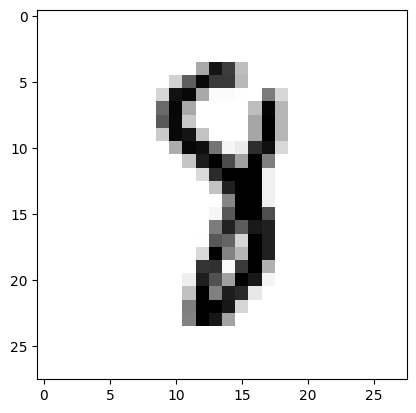

Classe real:  False
Classe predita pelo modelo:  [False]


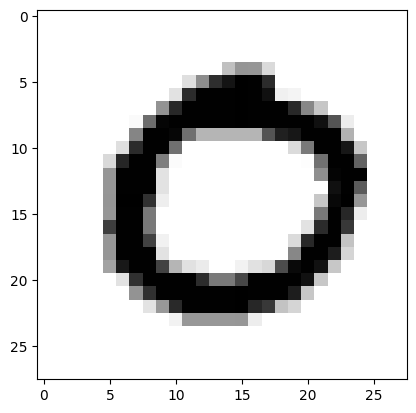

Classe real:  False
Classe predita pelo modelo:  [False]


In [21]:
for n in range(10): 
    plt.imshow(x_train[n].reshape(28, 28), cmap="binary")
    plt.show()
    print("Classe real: ", y_train_5[n])
    print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96712379, 0.96663197, 0.96730546])

acuracia de 96% - acerta 96% das vezes

In [23]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv = 3,scoring="accuracy")

array([0.90816701, 0.90883487, 0.91428396])

### A matriz de confusão

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[43931,   680],
       [  665,  3724]])

| True negative   | True positive 
|-----------------|------
| false negative  | False positive


In [27]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.8455949137148048
Recall:  0.8484848484848485


In [28]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))


[[43931   680]
 [  665  3724]]


In [29]:
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98     44611
        True       0.85      0.85      0.85      4389

    accuracy                           0.97     49000
   macro avg       0.92      0.92      0.92     49000
weighted avg       0.97      0.97      0.97     49000



### Classificação multiclasse

Modelo binario (2 opções true false) X Multiclasse (1,2,3,4,5,6,7,8,9,10)

In [30]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [35]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
y_train

array([0., 8., 0., ..., 3., 4., 2.])

In [37]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

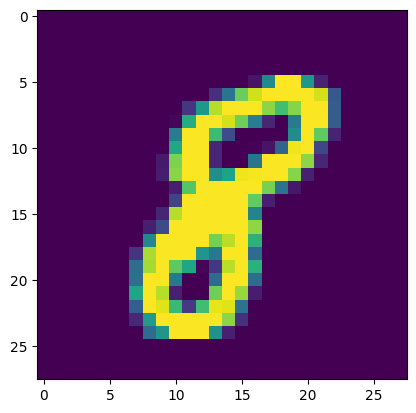

In [40]:
n = 1
digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [41]:
sgd_clf.predict([digit])

array([8.])

In [42]:
# cross_val_predict - diferente do cross_val_score

In [43]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4552    1   50   18   10   29   29    5   88   19]
 [   3 5339   88   26    6   12   12   11   65   11]
 [  45   72 4295   79   46   27   64   66  198   18]
 [  34   28  166 4218    9  168   19   59  200   79]
 [  34   24   47   14 4114   13   35   32   67  375]
 [  66   36   93  343   79 3171  136   29  328  108]
 [  40   14   90    6   37   61 4492    5   62    4]
 [  31   29   75   19   41   18    1 4654   36  241]
 [  36  112  168  178   45  175   39   51 3812  143]
 [  30   24   14   80  139   72    1  280  102 4135]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      4801
         1.0       0.94      0.96      0.95      5573
         2.0       0.84      0.87      0.86      4910
         3.0       0.85      0.85      0.85      4980
         4.0       0.91      0.87      0.89      4755
         5.0       0.85      0.72      0.78      4389
         6.0       0.93      0.93      0.93      4811
         7.0       0.90      0.90   

<Axes: >

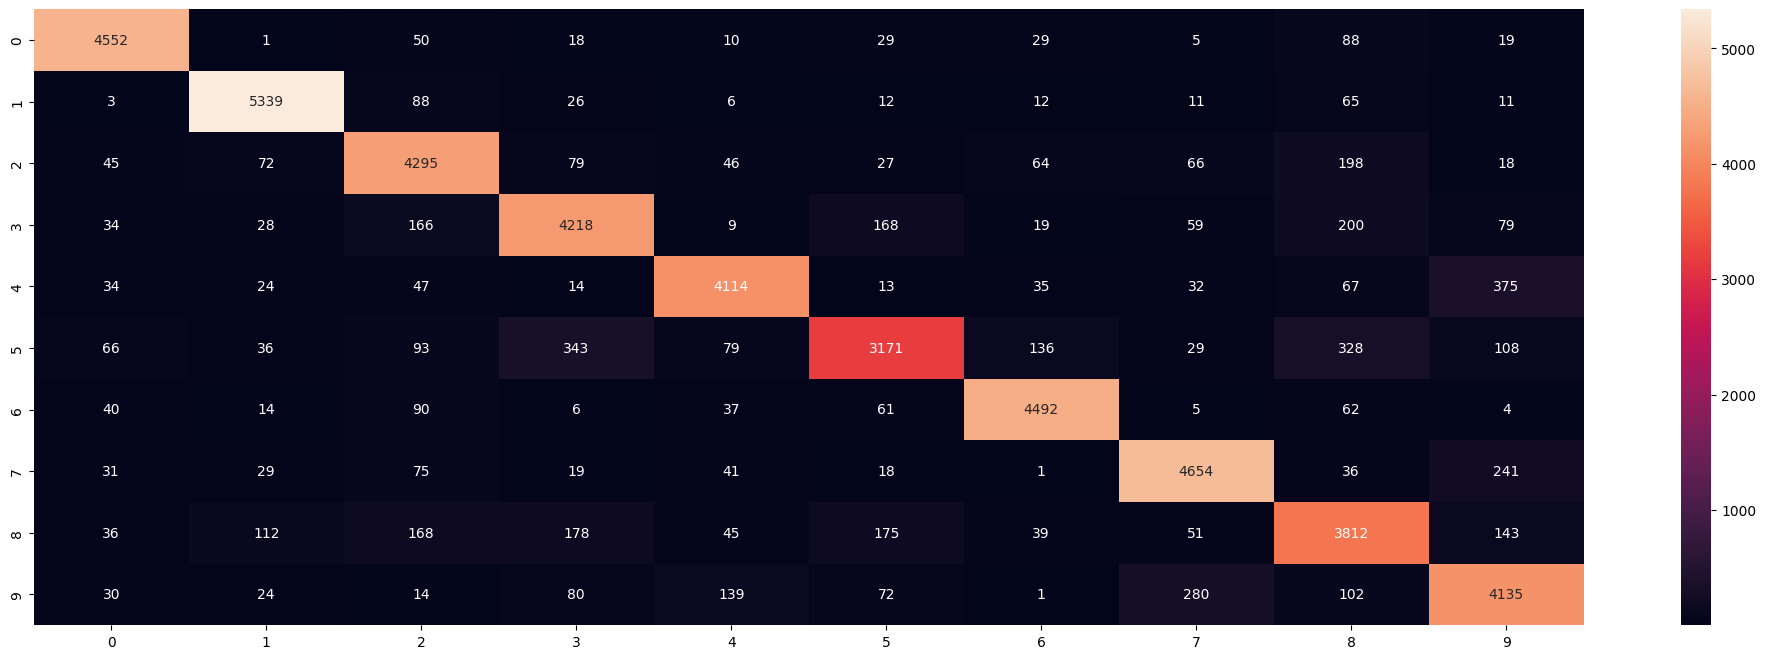

In [46]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<Axes: >

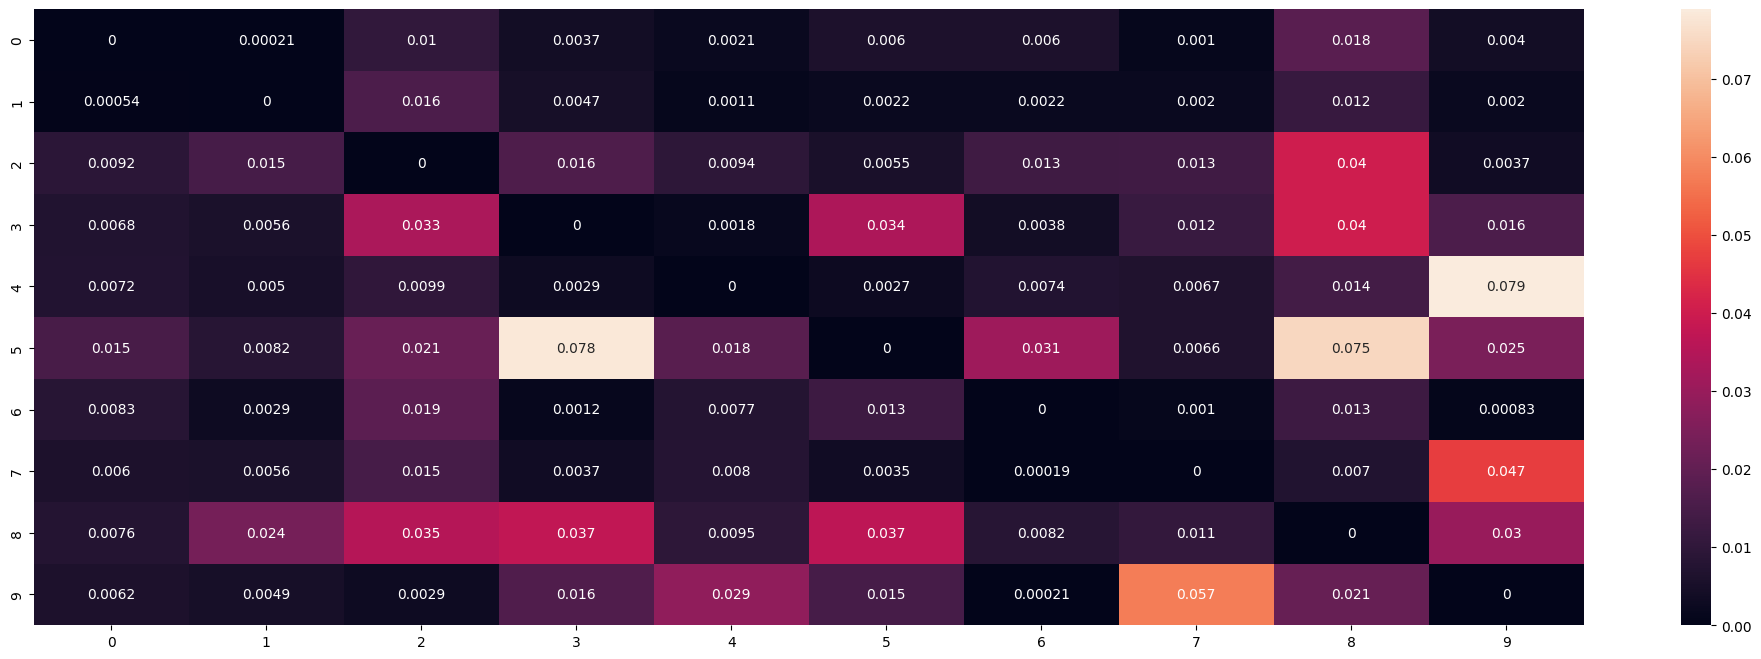

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

## Classificação Multilabel

O que você tem que dizer sobre a resposta - 

    - True X False - Modelo binario
    - (1,2,3,4,5,6,7,8,9,10) - Multiclasse
    - Impar ou par Multilabel

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]


In [50]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [51]:
n=4

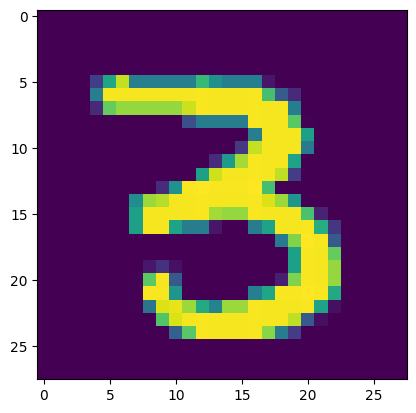

In [52]:
digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [55]:
resposta = knn_clf.predict([digit])
resposta

array([[False,  True]])

In [59]:
print("É maior que 7 :",resposta[0][0] ,  "é impar: ", resposta[0][1])

É maior que 7 : False é impar:  True
